Q1
(a) Load the dataset and choose “area” as the feature and “price” as the target. 
(b) Write a func on to implement Simple Linear Regression using Ordinary Least Squares (OLS) 
(derive slope & intercept). 

461.9748942727835
2387308.48239643


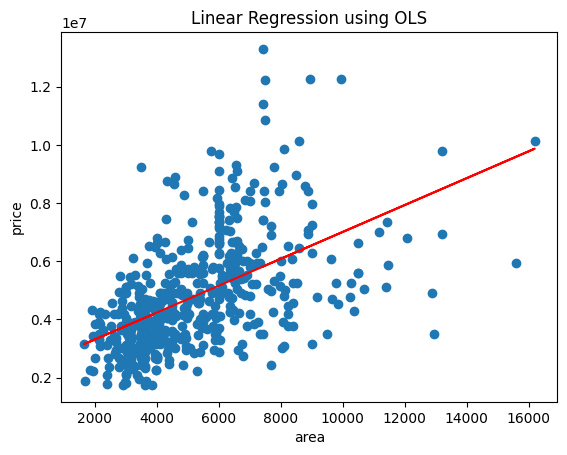

In [38]:

# Q1: a,b
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
csv_data=pd.read_csv('Housing.csv')
# print(csv_data.head())

# selecting area : feature, price : target
x=csv_data['area']
y=csv_data['price']

x_area=np.array(x)
y_price=np.array(y)

# using statsmodel
# for linear regression, calculating: slope, intercept, r value, p value, std_err
# slope, intercept, r, p, std_err=stats.linregress(x_area,y_price)
# print(slope)
# print(intercept)
# print(r)
# print(p)
# print(std_err)

# using numpy
x_mean = np.mean(x_area)
y_mean = np.mean(y_price)

slope= np.sum((x_area - x_mean) * (y_price - y_mean)) / np.sum((x_area - x_mean)**2)
intercept = y_mean - slope * x_mean

print(slope)
print(intercept)

# model for prediction
def PredictionModel(x):
    return slope*x+intercept

myModel=list(map(PredictionModel,x_area))

plt.scatter(x_area,y_price)
plt.plot(x_area, myModel, color='red')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Linear Regression using OLS')
plt.show()

(c) Write another func on for Simple Linear Regression using Gradient Descent (GD) with a learning 
rate and fixed itera ons.

0.463603120237874
2.1350179524417495e-16


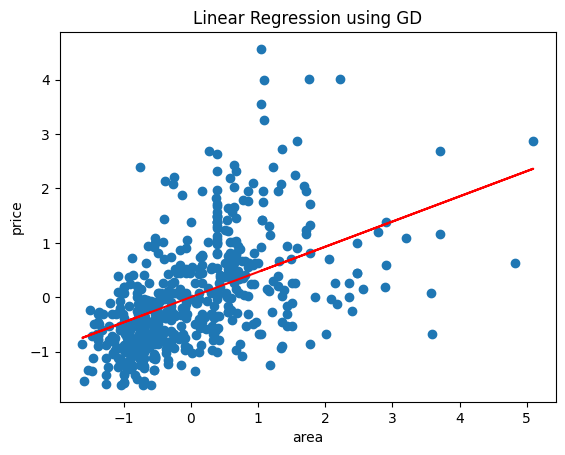

In [36]:
# Q1: c
# simple liner regression using Gradient Descent
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_data=pd.read_csv('Housing.csv')
# print(csv_data.head())

x_area=np.array(csv_data['area'])
y_price=np.array(csv_data['price'])
# print(x_area)
# print(y_price)

# normalizing the data
x_area_new = (x_area - np.mean(x_area)) / np.std(x_area)
y_price_new = (y_price - np.mean(y_price)) / np.std(y_price)


def gradient_descent_algorithm(x,y,learning_rate, n_iteration):
    # letting m, c
    m=0
    c=0
    N=len(x)
    for _ in range(n_iteration):
        y_predicted=m*x+c

        # gradients
        dm = (-2/N) * np.sum(x * (y - y_predicted))
        dc = (-2/N) * np.sum(y - y_predicted)

        # updating params
        m-=learning_rate*dm
        c-=learning_rate*dc
    return m,c


# n iteration, learning rate
l_rate=0.001
n_iteration=1000
m_optimized,c_optimized=gradient_descent_algorithm(x_area_new,y_price_new,l_rate,n_iteration)

# slope and intercept
print(m_optimized)
print(c_optimized)

# model for prediction
def predictionModel(x):
    return m_optimized*x+c_optimized

myModel=list(map(predictionModel,x_area_new))

plt.scatter(x_area_new,y_price_new)
plt.plot(x_area_new,myModel,color='red')
plt.xlabel('area')
plt.ylabel('price')
plt.title('Linear Regression using GD')
plt.show()
